In [142]:
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
%run train_toycar.py

FILEHOME = os.path.abspath(os.path.curdir)
datapath = '/home/colin/Repos/prx_ws/src/prx_output/data_output_50Hz_clean_short_small.txt'
solverpath = FILEHOME + '/toycar_solver.prototxt'
structurepath = FILEHOME + '/toycar_2fc_hdf5.prototxt'
deploypath = FILEHOME + '/toycar_2fc_deploy.prototxt'
weightspath = FILEHOME + '/2fc_iter_20001.caffemodel'

model = Model(datapath)
mlp = Network(model, solverpath, structurepath, deploypath, weightspath)
# gp = SGPRegression(model)


done Reading
start states:  (1000037, 5)


In [143]:
# gp.train()

mlp.train()

In [144]:
nndata = mlp.test_data[:10000, :]
nnlabels = mlp.test_labels[:10000, :]
nnpred = mlp.test(nndata)
nnpred_diff = np.sum(np.abs(nnpred - nnlabels), axis=1)

# gpdata = gp.test_data[:, :]
# gplabels = gp.test_labels[:, :]
# gppred = gp.test(gpdata)[0]
# gppred_diff = np.sum(np.abs(gppred - gplabels), axis=1)

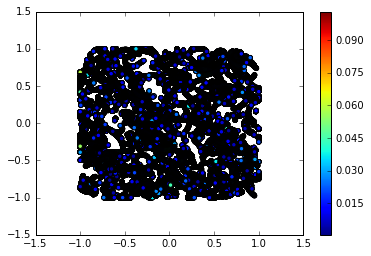

0


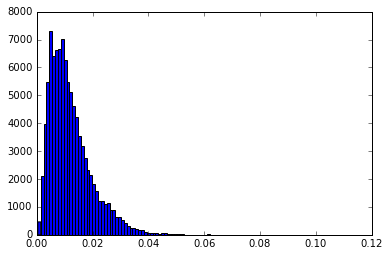

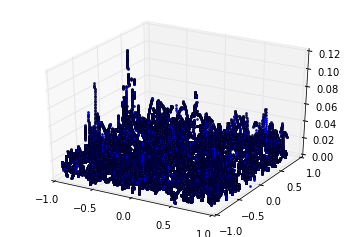

In [140]:
mlp.plot2d(nndata[:, 0], nndata[:, 1], c=nnpred_diff)
# np.max(nnpred_diff)
plt.hist(nnpred_diff, bins=100)
i = 0
for x in nnpred_diff:
    if x > 1: i+=1
print i
mlp.plot3d(nndata[:, 0], nndata[:, 1], nnpred_diff, sz=2)

In [145]:
print np.median(np.square(nnpred_diff))
# print np.median(np.square(gppred_diff))

print np.max(nnpred_diff)

0.0002335639929
0.0533461743908


In [137]:
idxs = np.argwhere(gppred_diff>0.04)
# idxs2 = [idx+1 for idx in idxs]
# idxs = np.sort(np.concatenate((idxs, idxs2), axis=0), axis=0)

# idxs = [idx+900000 for idx in idxs]
for idx in idxs:
    x = idx+900000
    pred = gppred[idx,:] + gp.start_states[x,:]
    print "start: ", gp.start_states[x,:]
    print "end: ", gp.end_states[x,:]
    print "pred: ", pred

# for i,x in enumerate(datapts):        
#     print idxs[i]
#     print model.unnormalize_data(x)




start:  [[ -6.92206573 -30.          -0.76737767   2.95835924  -0.11370191]]
end:  [[ -6.87979794 -30.          -0.77413058   2.97104406  -0.11484236]]
pred:  [[ -6.88785753 -30.02416078  -0.77395993   2.96329985  -0.11491309]]
start:  [[ -6.87979794 -30.          -0.77413058   2.97104406  -0.11484236]]
end:  [[ -6.83763552 -30.          -0.78097987   2.98372865  -0.11598281]]
pred:  [[ -6.84558038 -30.02445031  -0.78080653   2.97581925  -0.11605265]]
start:  [[ -6.83763552 -30.          -0.78097987   2.98372865  -0.11598281]]
end:  [[ -6.79558659 -30.          -0.78792602   2.99641347  -0.11712325]]
pred:  [[ -6.80341284 -30.02474284  -0.78775003   2.9883365   -0.11719219]]


(array([   9.,   12.,   16.,   19.,   26.,   28.,   27.,   25.,   27.,
          24.,   24.,   21.,   21.,   28.,   60.,   45.,   57.,   25.,
          34.,   32.,   34.,   31.,   33.,   37.,   76.,   61.,   89.,
          70.,  138.,  118.,  132.,  105.,  116.,  238.,  179.,  129.,
         112.,   91.,   85.,  192.,  293.,  280.,  274.,  394.,  428.,
         462.,  339.,  389.,  378.,  364.,  286.,  254.,  265.,  199.,
         201.,  139.,  204.,  170.,  184.,  204.,  118.,   94.,   88.,
         106.,   71.,   64.,   43.,   40.,   95.,   66.,   46.,   49.,
          60.,   60.,   70.,   54.,   52.,   34.,   32.,   32.,   38.,
          53.,   53.,   38.,   15.,   12.,   12.,   13.,   30.,   10.,
           9.,    3.,    7.,   14.,   14.,   13.,   14.,   15.,   15.,   15.]),
 array([-0.02665639, -0.02606783, -0.02547928, -0.02489072, -0.02430216,
        -0.02371361, -0.02312505, -0.02253649, -0.02194794, -0.02135938,
        -0.02077082, -0.02018227, -0.01959371, -0.01900515, -0.0

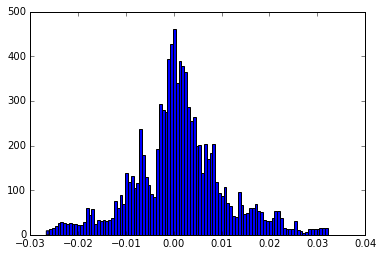

In [117]:
plt.hist(gplabels[:, 2], bins=100)



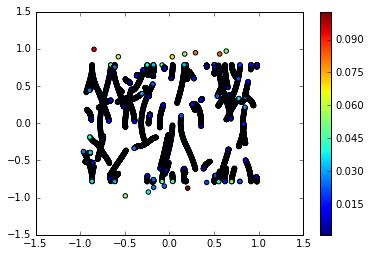

In [128]:
gp.plot2d(gpdata[:, 1], gpdata[:, 2], c=gppred_diff)

In [104]:
gp.start_states[gp.start_states.shape[0]-1,:]

array([ -4.074893  ,  13.19006252,   1.95832241,   2.29802942,   0.51443219], dtype=float32)

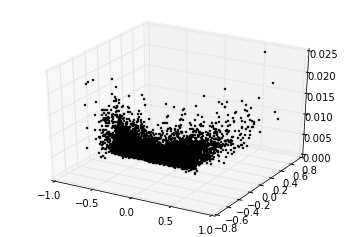

In [105]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(mlp.test_data[:10000,0],mlp.test_data[:10000,1],
       pred_diff, 'o', , ms=2)

In [111]:
line = "098,809,798,324,234,2123,321,123"
vals = line.split(",")
x = [float(val) for val in vals]
y = [float(val) for val in vals]
x.append(y)

In [112]:
x

[98.0,
 809.0,
 798.0,
 324.0,
 234.0,
 2123.0,
 321.0,
 123.0,
 [98.0, 809.0, 798.0, 324.0, 234.0, 2123.0, 321.0, 123.0]]